## Tensorflow From Scratch

#### Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# create a constant tensor
x = tf.constant([[5, 0], [1, 3]]) 
print(x)

tf.Tensor(
[[5 0]
 [1 3]], shape=(2, 2), dtype=int32)


In [3]:
# convert to numpy array
x.numpy() 

array([[5, 0],
       [1, 3]], dtype=int32)

In [4]:
x = tf.constant(3.0) # create a constant tensor
with tf.GradientTape() as tape: # GradientTape records operations for automatic differentiation
    tape.watch(x)
    y = x * x

print(tape.gradient(y, x).numpy()) # compute the gradient of y with respect to x

6.0


In [ ]:
dense1 = tf.keras.layers.Dense(32) # create a dense layer with 32 units
dense2 = tf.keras.layers.Dense(32)

with tf.GradientTape() as tape:
    result = dense2(dense1(tf.zeros([1, 10]))) # chain the two layers dense1 and dense2, tf.zeros([1, 10]) is the input that is passed through the layers
    tape.gradient(result, dense1.variables) # compute the gradient of the result with respect to the variables of dense1


In [8]:
def make_noisy_data(m=0.1, b=0.3, n=100): # m=0.1 and b=0.3 are the slope and the intercept of the line, n=100 is the number of data points
  x = tf.random.uniform(shape=(n,)) # generate random data points, here shape=(n,) means that x is a 1D array with n elements
  noise = tf.random.normal(shape=(len(x),), stddev=0.01) # generate random noise, stddev is the standard deviation of the normal distribution
  y = m * x + b + noise # compute the y values
  return x, y

# make_noisy_data() returns two tensors x and y, x is the input data and y is the noisy output data

In [9]:
x_train, y_train = make_noisy_data() # generate training data

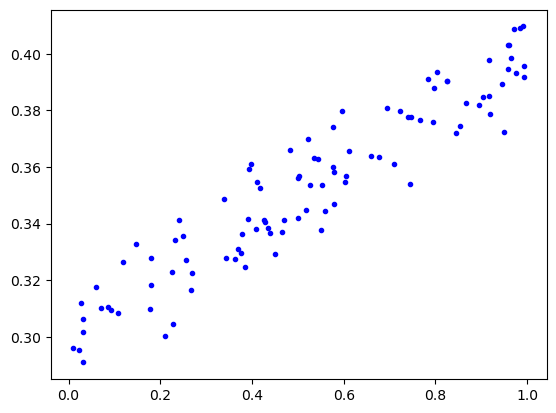

In [10]:
plt.plot(x_train, y_train, 'b.') # plot the training data

In [11]:
m = tf.Variable(0.) # initialize the slope
b = tf.Variable(0.) # initialize the intercept

In [12]:
# linear regression model
def predict(x): 
    y = m * x + b 
    return y

In [13]:
# compute the squared error
def squared_error(y_pred, y_true): 
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [14]:
# compute the loss
loss = squared_error(predict(x_train), y_train) 
print('Starting Loss', loss.numpy())

Starting Loss 0.12563357


In [15]:
learning_rate = 0.05 # set the learning rate
steps = 200 # set the number of optimization steps

for i in range(steps):
  
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)
    
  gradients = tape.gradient(loss, [m, b])
  
  m.assign_sub(gradients[0] * learning_rate) # update the slope
  b.assign_sub(gradients[1] * learning_rate) # update the intercept
  
  if i % 20 == 0:    
    print("Step %d, Loss %f" % (i, loss.numpy())) # print the loss every 20 steps


Step 0, Loss 0.125634
Step 20, Loss 0.000780
Step 40, Loss 0.000254
Step 60, Loss 0.000217
Step 80, Loss 0.000191
Step 100, Loss 0.000170
Step 120, Loss 0.000154
Step 140, Loss 0.000142
Step 160, Loss 0.000132
Step 180, Loss 0.000125


In [16]:
# print the final slope and intercept
print ("m: %f, b: %f" % (m.numpy(), b.numpy()))

m: 0.112903, b: 0.293078


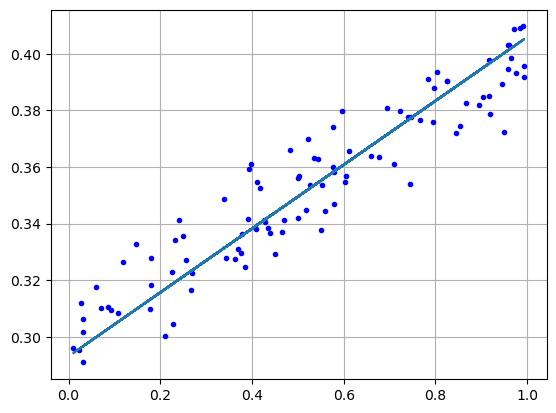

In [17]:
# plot the training data and the learned line
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, predict(x_train))
plt.grid('off')